**Program Initialization Section**

Import packages here


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from sklearn import datasets
import xgboost as xgb

**1. Data Source and Contents**

    The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:

    • Number of target classes: 2 ('>50K' and '<=50K') 
        [ Labels: 1, 0 ]
    • Number of attributes (Columns): 7

    • Number of instances (Rows): 48,842


**2. Data Quality Analysis**

    Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
    • Display descriptive statistics of each column
    • Perform necessary data cleansing and transformation based on your observations from the data quality analysis

In [22]:
#Reading in the dataset
data = pd.read_csv('census_data (1).csv')

data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [33]:
# Data Transformation to Integer

modeling_data = data.copy()

modeling_data.replace(regex={r'[a]. ': 1, r'[b]. ': 2,r'[c]. ': 3, r'[d]. ': 4,r'[e]. ': 5}, inplace = True)
modeling_data.head() # conversion successful
modeling_data_test = modeling_data[modeling_data.flag == 'test']
modeling_data_train = modeling_data[modeling_data.flag == 'train']

modeling_data_train.head()
modeling_data_train.tail() # the data has been successfully split by flag

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,2,2,2,3,3,3,3,2,4,train,0
1,1,5,3,1,3,3,3,2,5,train,0
2,2,1,2,1,3,2,2,2,4,train,0
3,2,1,3,1,2,1,1,2,5,train,0
4,2,5,3,1,1,3,3,2,2,train,0


In [15]:
#Shape of data
data.shape

(48842, 11)

In [16]:
#Outliers
data.max()
data.min()

hours_per_week_bin         a. 0-30
occupation_bin              a. Low
msr_bin                     a. Low
capital_gl_bin              a. = 0
race_sex_bin                a. Low
education_num_bin           a. 0-8
education_bin               a. Low
workclass_bin         a. no income
age_bin                    a. 0-25
flag                          test
y                                0
dtype: object

In [17]:
#Number of null values
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [28]:
data.describe
data.info
data.dtypes # data types look correct
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

**3. Finding Optimal Value of a key Hyper-parameter**

In [ ]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figures(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

4. Building a Random Forest Model

In [34]:
X = modeling_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']] # features
y = modeling_data['y'] #label

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
#example model
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [39]:
#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8341636524943697


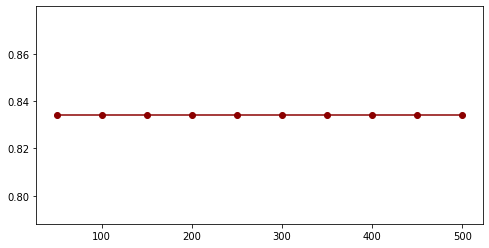

In [61]:
#checking accuracy for multiple estimators
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = RandomForestClassifier(max_depth=trees, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

1. Write your observations about the Classifier’s behavior with respect to the
number of estimators
    *   There does not seem to be a change in accuracy across models with a different number of estimators, which I find hard to believe, though I am also unsure which part of my model is incorrect.

2. Is there an optimal value of the estimator within the given range?
    *   According to this output, there is not an optimal value of estimators.






5. Building AdaBoost, Gradient Boost (classifier) and XGB Model

In [51]:
#AdaBoost
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8425578379853955


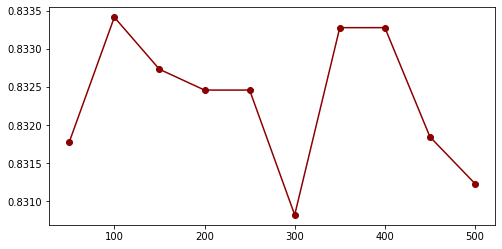

In [64]:
#checking accuracy for multiple estimators
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=trees, random_state=101))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

1. Write your observations about the Classifier’s behavior with respect to the
number of estimators
    *   The pattern here is quite inconsistent, and we cannot confidently say that accuracy improves as the number of trees increases at a random state of 101. Rerunning the model at any random state value, reproduces an entirely new graph as well, leading to more inconsistencies. 

2. Is there an optimal value of the estimator within the given range?
    *   According to this trial, the optimal number of esitmators is 50.

In [114]:
#Gradient Boost

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8451511635842489


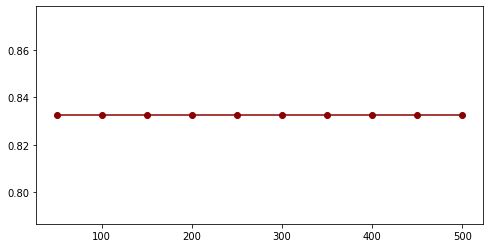

In [78]:
#checking accuracy for multiple estimators
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = GradientBoostingClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

In [104]:
#XGB
#method 1
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3,
    'max_depth': 100}

steps = 20

model = xgb.train(param, D_train, steps)

#method 2

xg_class = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8325257626424623


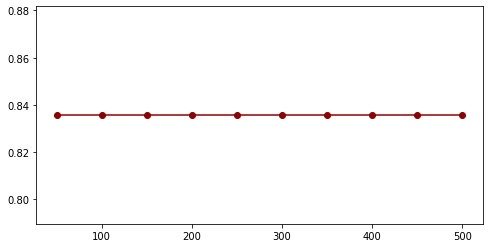

In [105]:
#checking accuracy for multiple estimators
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = xgb.XGBClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

5. Compare Performance

In [107]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))
print("AUC:" ,metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8345048795468505
AUC: 0.742532753277573


In [108]:
#AdaBoost
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))
print("AUC:" ,metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8425578379853955
AUC: 0.7431724906451644


In [112]:
#GradientBoost

classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))
print("AUC:" ,metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8451511635842489
AUC: 0.7548795058813997


In [113]:
#XGB
xg_class = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))
print("AUC:" ,metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8451511635842489
AUC: 0.7548795058813997
